In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
from defs import smm, mask

In [2]:
folder = 'Data_processed/'
modellist =  ['CCSM4-UoT', 'CESM2', 'IPSL-CM5A2', 'MIROC4m', 'COSMOS', 'HadCM3', 'NorESM1-F']

In [3]:
#Open precipitation datasets and calculate SMM
dsE280pr, dsE400pr, dsEoi400pr = xr.open_dataset(folder+'SMM_ensemble/E280/Pr_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/E400/Pr_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/Eoi400/Pr_100yr.nc')
prsmmE280, prsmmE400, prsmmEoi400 = smm(dsE280pr.pr), smm(dsE400pr.pr), smm(dsEoi400pr.pr)

#Open PmE datasets and calculate SMM
dsE280pme, dsE400pme, dsEoi400pme = xr.open_dataset(folder+'SMM_ensemble/E280/PmE_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/E400/PmE_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/Eoi400/PmE_100yr.nc')
pmesmmE280, pmesmmE400, pmesmmEoi400 = smm(dsE280pme.pme), smm(dsE400pme.pme), smm(dsEoi400pme.pme)

#Open salinity datasets and calculate SMM
dsE280s, dsE400s, dsEoi400s = xr.open_dataset(folder+'SMM_ensemble/E280/so_1x1_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/E400/so_1x1_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/Eoi400/so_1x1_100yr.nc')
ssssmmE280, ssssmmE400, ssssmmEoi400 = smm(dsE280s.so[:,0]), smm(dsE400s.so[:,0]), smm(dsEoi400s.so[:,0])

#Open evaporation datasets and calculate SMM
dsE280eva, dsE400eva, dsEoi400eva = xr.open_dataset(folder+'SMM_ensemble/E280/eva_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/E400/eva_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/Eoi400/eva_100yr.nc')
evasmmE280, evasmmE400, evasmmEoi400 = smm(dsE280eva.eva), smm(dsE400eva.eva), smm(dsEoi400eva.eva)

dsgrid = xr.open_dataset(folder+'1x1grid.nc')
area = dsgrid.area

#Open and calculate MMM sea-ice cover
dsE280 = xr.open_dataset(folder+'SMM_ensemble/E280/SI_100yr.nc')
dsE400 = xr.open_dataset(folder+'SMM_ensemble/E400/SI_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/SI_100yr.nc')

siE280 = smm(dsE280.si_mean)
siE400 = smm(dsE400.si_mean)
siEoi400 = smm(dsEoi400.si_mean)

In [4]:
#Making masks for significance, threshold = 5 for significane

coords, maskpr1 = mask(dsE280pr.pr, dsEoi400pr.pr, prsmmEoi400, 5)
coords, maskpr2 = mask(dsE280pr.pr, dsE400pr.pr, prsmmEoi400, 5)
coords, maskpr3 = mask(dsE400pr.pr, dsEoi400pr.pr, prsmmEoi400, 5)

coords, masks1 = mask(dsE280s.so[:,0], dsEoi400s.so[:,0], ssssmmEoi400, 5)
coords, masks2 = mask(dsE280s.so[:,0], dsE400s.so[:,0], ssssmmEoi400, 5)
coords, masks3 = mask(dsE400s.so[:,0], dsEoi400s.so[:,0], ssssmmEoi400, 5)

coords, maskpme1 = mask(dsE280pme.pme, dsEoi400pme.pme, pmesmmEoi400, 5)
coords, maskpme2 = mask(dsE280pme.pme, dsE400pme.pme, pmesmmEoi400, 5)
coords, maskpme3 = mask(dsE400pme.pme, dsEoi400pme.pme, pmesmmEoi400, 5)

coords, maskeva1 = mask(dsE280eva.eva, dsEoi400eva.eva, evasmmEoi400, 5)
coords, maskeva2 = mask(dsE280eva.eva, dsE400eva.eva, evasmmEoi400, 5)
coords, maskeva3 = mask(dsE400eva.eva, dsEoi400eva.eva, evasmmEoi400, 5)

/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62333/3389980066.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap0 = plt.cm.get_cmap("cmo.rain",10).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62333/3389980066.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = plt.cm.get_cmap("cmo.curl_r",10).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62333/3389980066.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm

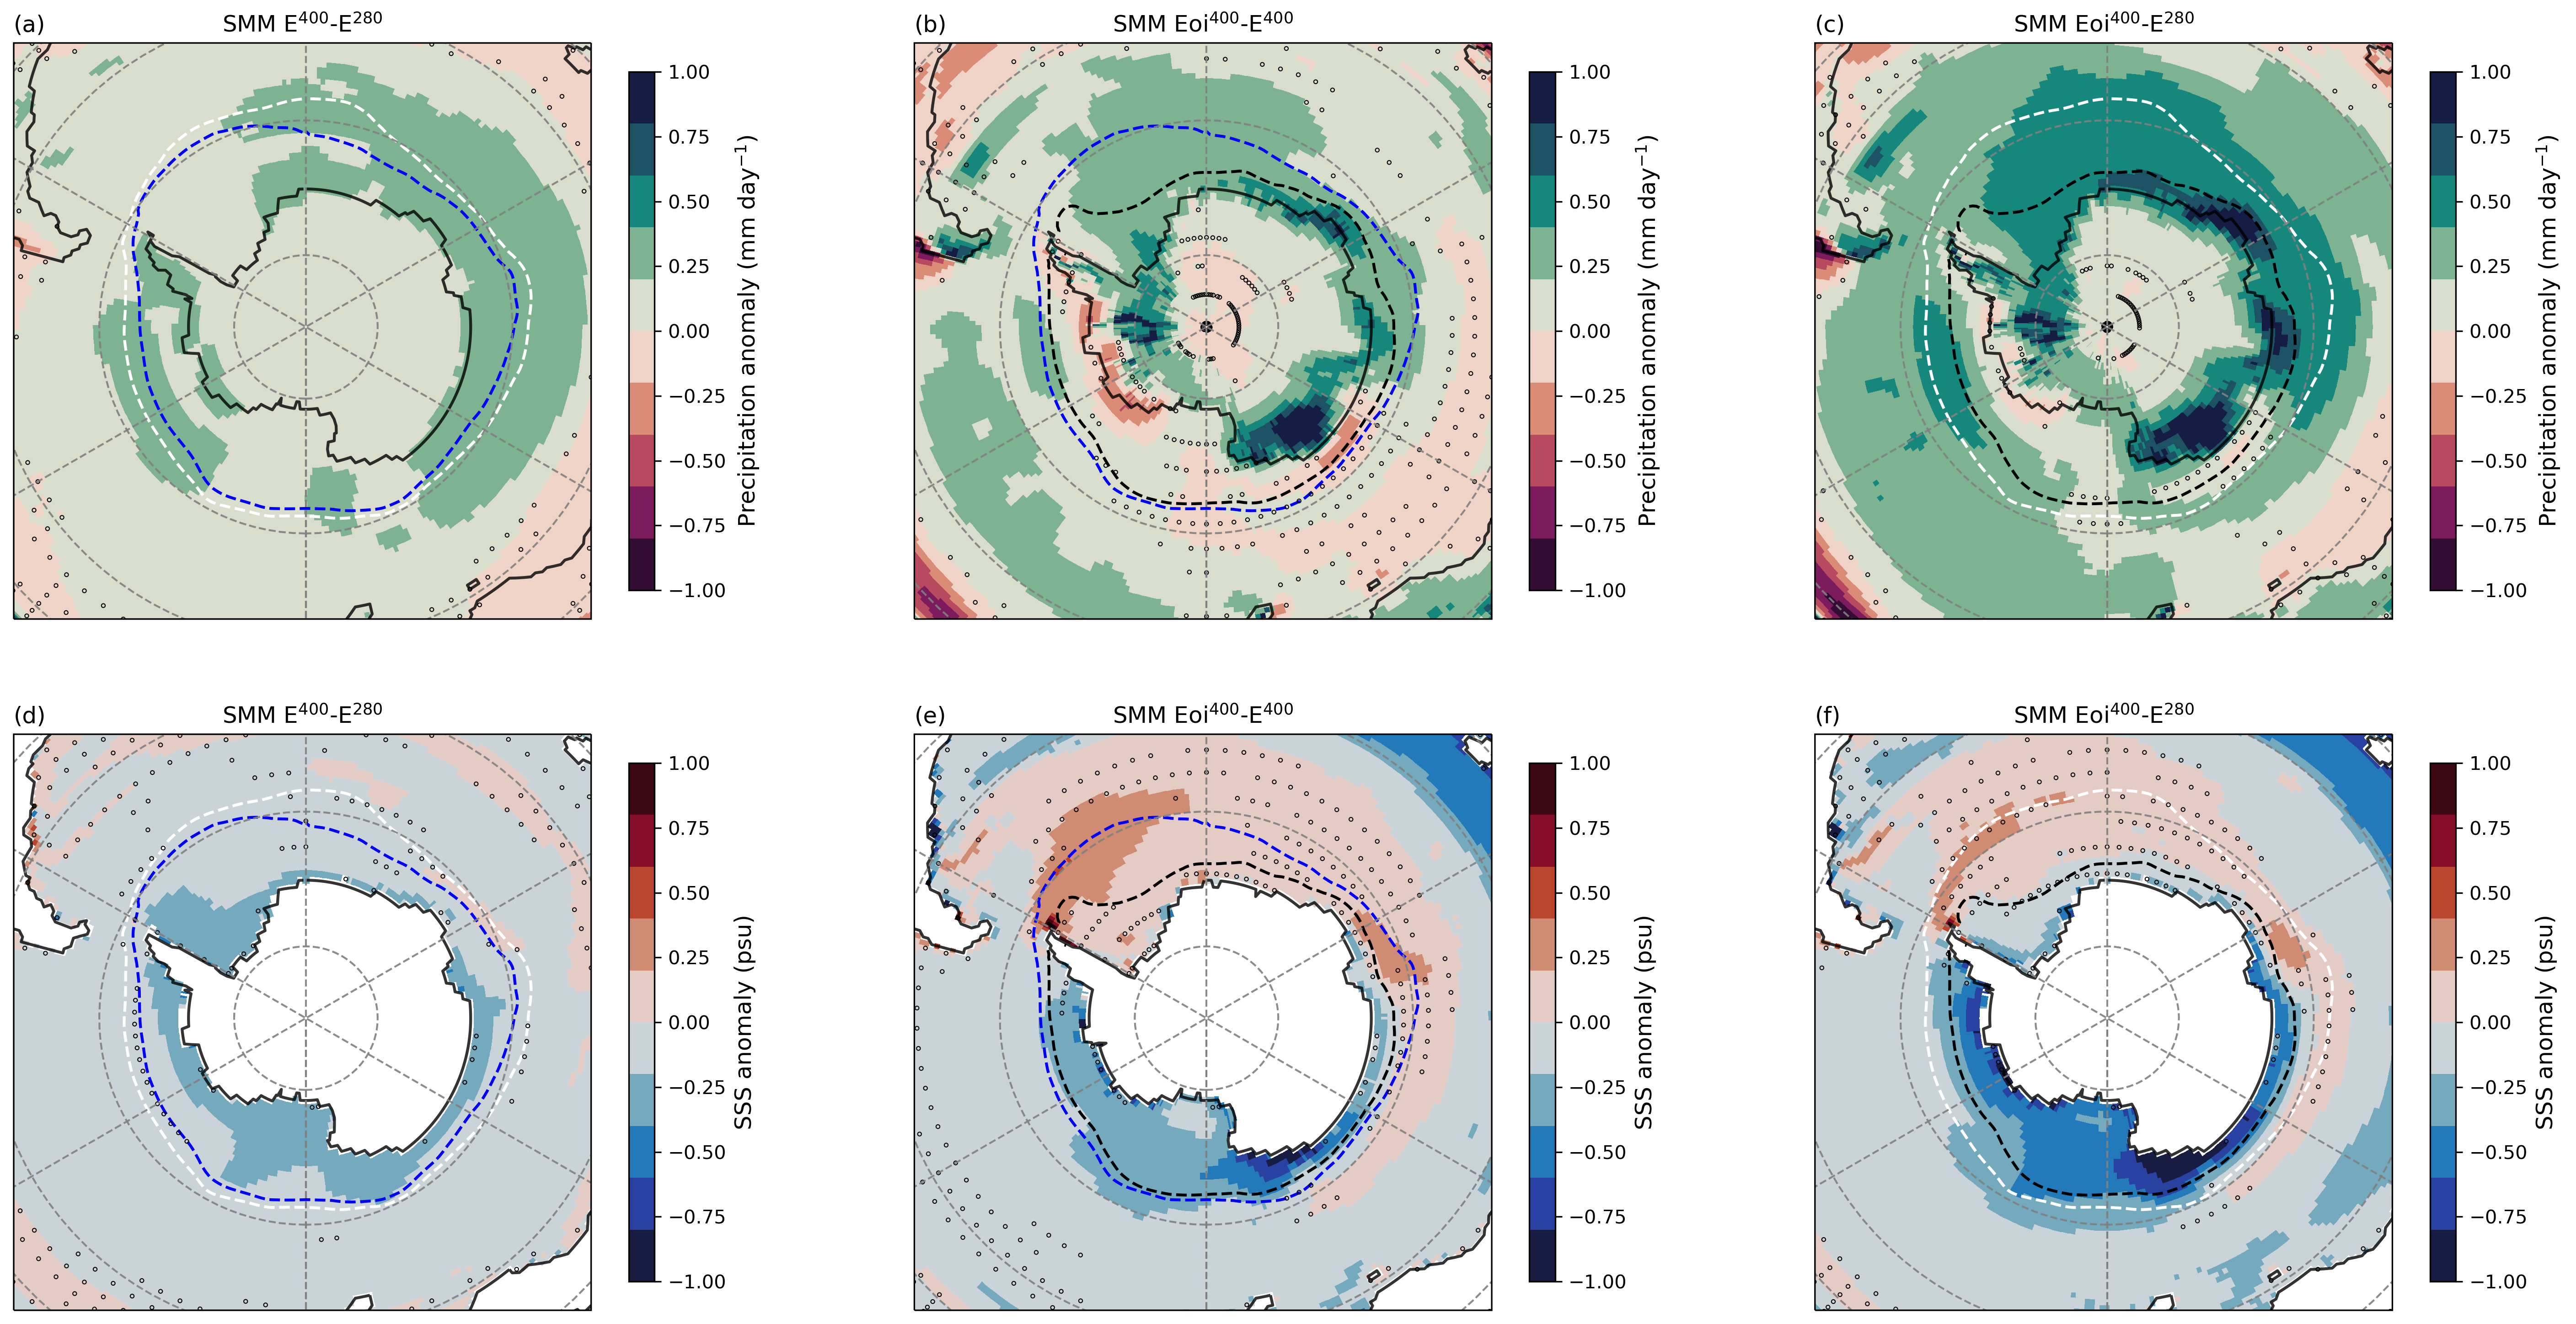

In [5]:
## creeer je figuur:
fig = plt.figure(figsize=(24,12), dpi=300)
## creeer je assen. Ik voeg hier de projectie 'plate carree' toe, Cartopy heeft verschillende, bijv EqualEarth
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)

cmap0 = plt.cm.get_cmap("cmo.rain",10).copy()
cmap0.set_under('black')

cmap2 = plt.cm.get_cmap("cmo.curl_r",10).copy()
#cmap2.set_under('black')

cmap3 = plt.cm.get_cmap("cmo.balance",10).copy()
cmap3.set_bad('white')

iceline = 15

ax = fig.add_subplot(231, projection=proj)
im=ax.pcolormesh(prsmmE280.lon,prsmmE280.lat,(prsmmE400-prsmmE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpr2==0)[::4,::4], coords.lat2D.where(maskpr2==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM E$^{400}$-E$^{280}$', loc='center')
ax.set_title(r'(a)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')


ax = fig.add_subplot(233, projection=proj)
im=ax.pcolormesh(prsmmE280.lon,prsmmE280.lat,(prsmmEoi400-prsmmE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpr1==0)[::4,::4], coords.lat2D.where(maskpr1==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{280}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(c)', loc='left')


ax = fig.add_subplot(232, projection=proj)
im=ax.pcolormesh(prsmmE280.lon,prsmmE280.lat,(prsmmEoi400-prsmmE400).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpr3==0)[::4,::4], coords.lat2D.where(maskpr3==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precipitation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{400}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(b)', loc='left')


ax = fig.add_subplot(234, projection=proj)
im=ax.pcolormesh(ssssmmE280.lon,ssssmmE280.lat,(ssssmmE400-ssssmmE280), transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siE400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(masks2==0).where(siE280>=0)[::4,::4], coords.lat2D.where(masks2==0).where(siE280>=0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS anomaly (psu)', fontsize=12)
ax.set_title('SMM E$^{400}$-E$^{280}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(d)', loc='left')


ax = fig.add_subplot(236, projection=proj)
im=ax.pcolormesh(ssssmmE280.lon,ssssmmE280.lat,(ssssmmEoi400-ssssmmE280), transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(masks1==0).where(siE280>=0)[::4,::4], coords.lat2D.where(masks1==0).where(siE280>=0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS anomaly (psu)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{280}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(f)', loc='left')


ax = fig.add_subplot(235, projection=proj)
im=ax.pcolormesh(ssssmmE280.lon,ssssmmE280.lat,(ssssmmEoi400-ssssmmE400), transform=ccrs.PlateCarree(), cmap=cmap3, vmin = -1, vmax = 1)
ax.contour(siE400.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400.where(siE400>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(masks3==0).where(siE280>=0)[::4,::4], coords.lat2D.where(masks3==0).where(siE280>=0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SSS anomaly (psu)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{400}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(e)', loc='left')

#plt.savefig('Fig8.png', bbox_inches='tight')
plt.show()

/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62333/2599318407.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap0 = plt.cm.get_cmap("cmo.rain",10).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62333/2599318407.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = plt.cm.get_cmap("cmo.curl_r",10).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62333/2599318407.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm

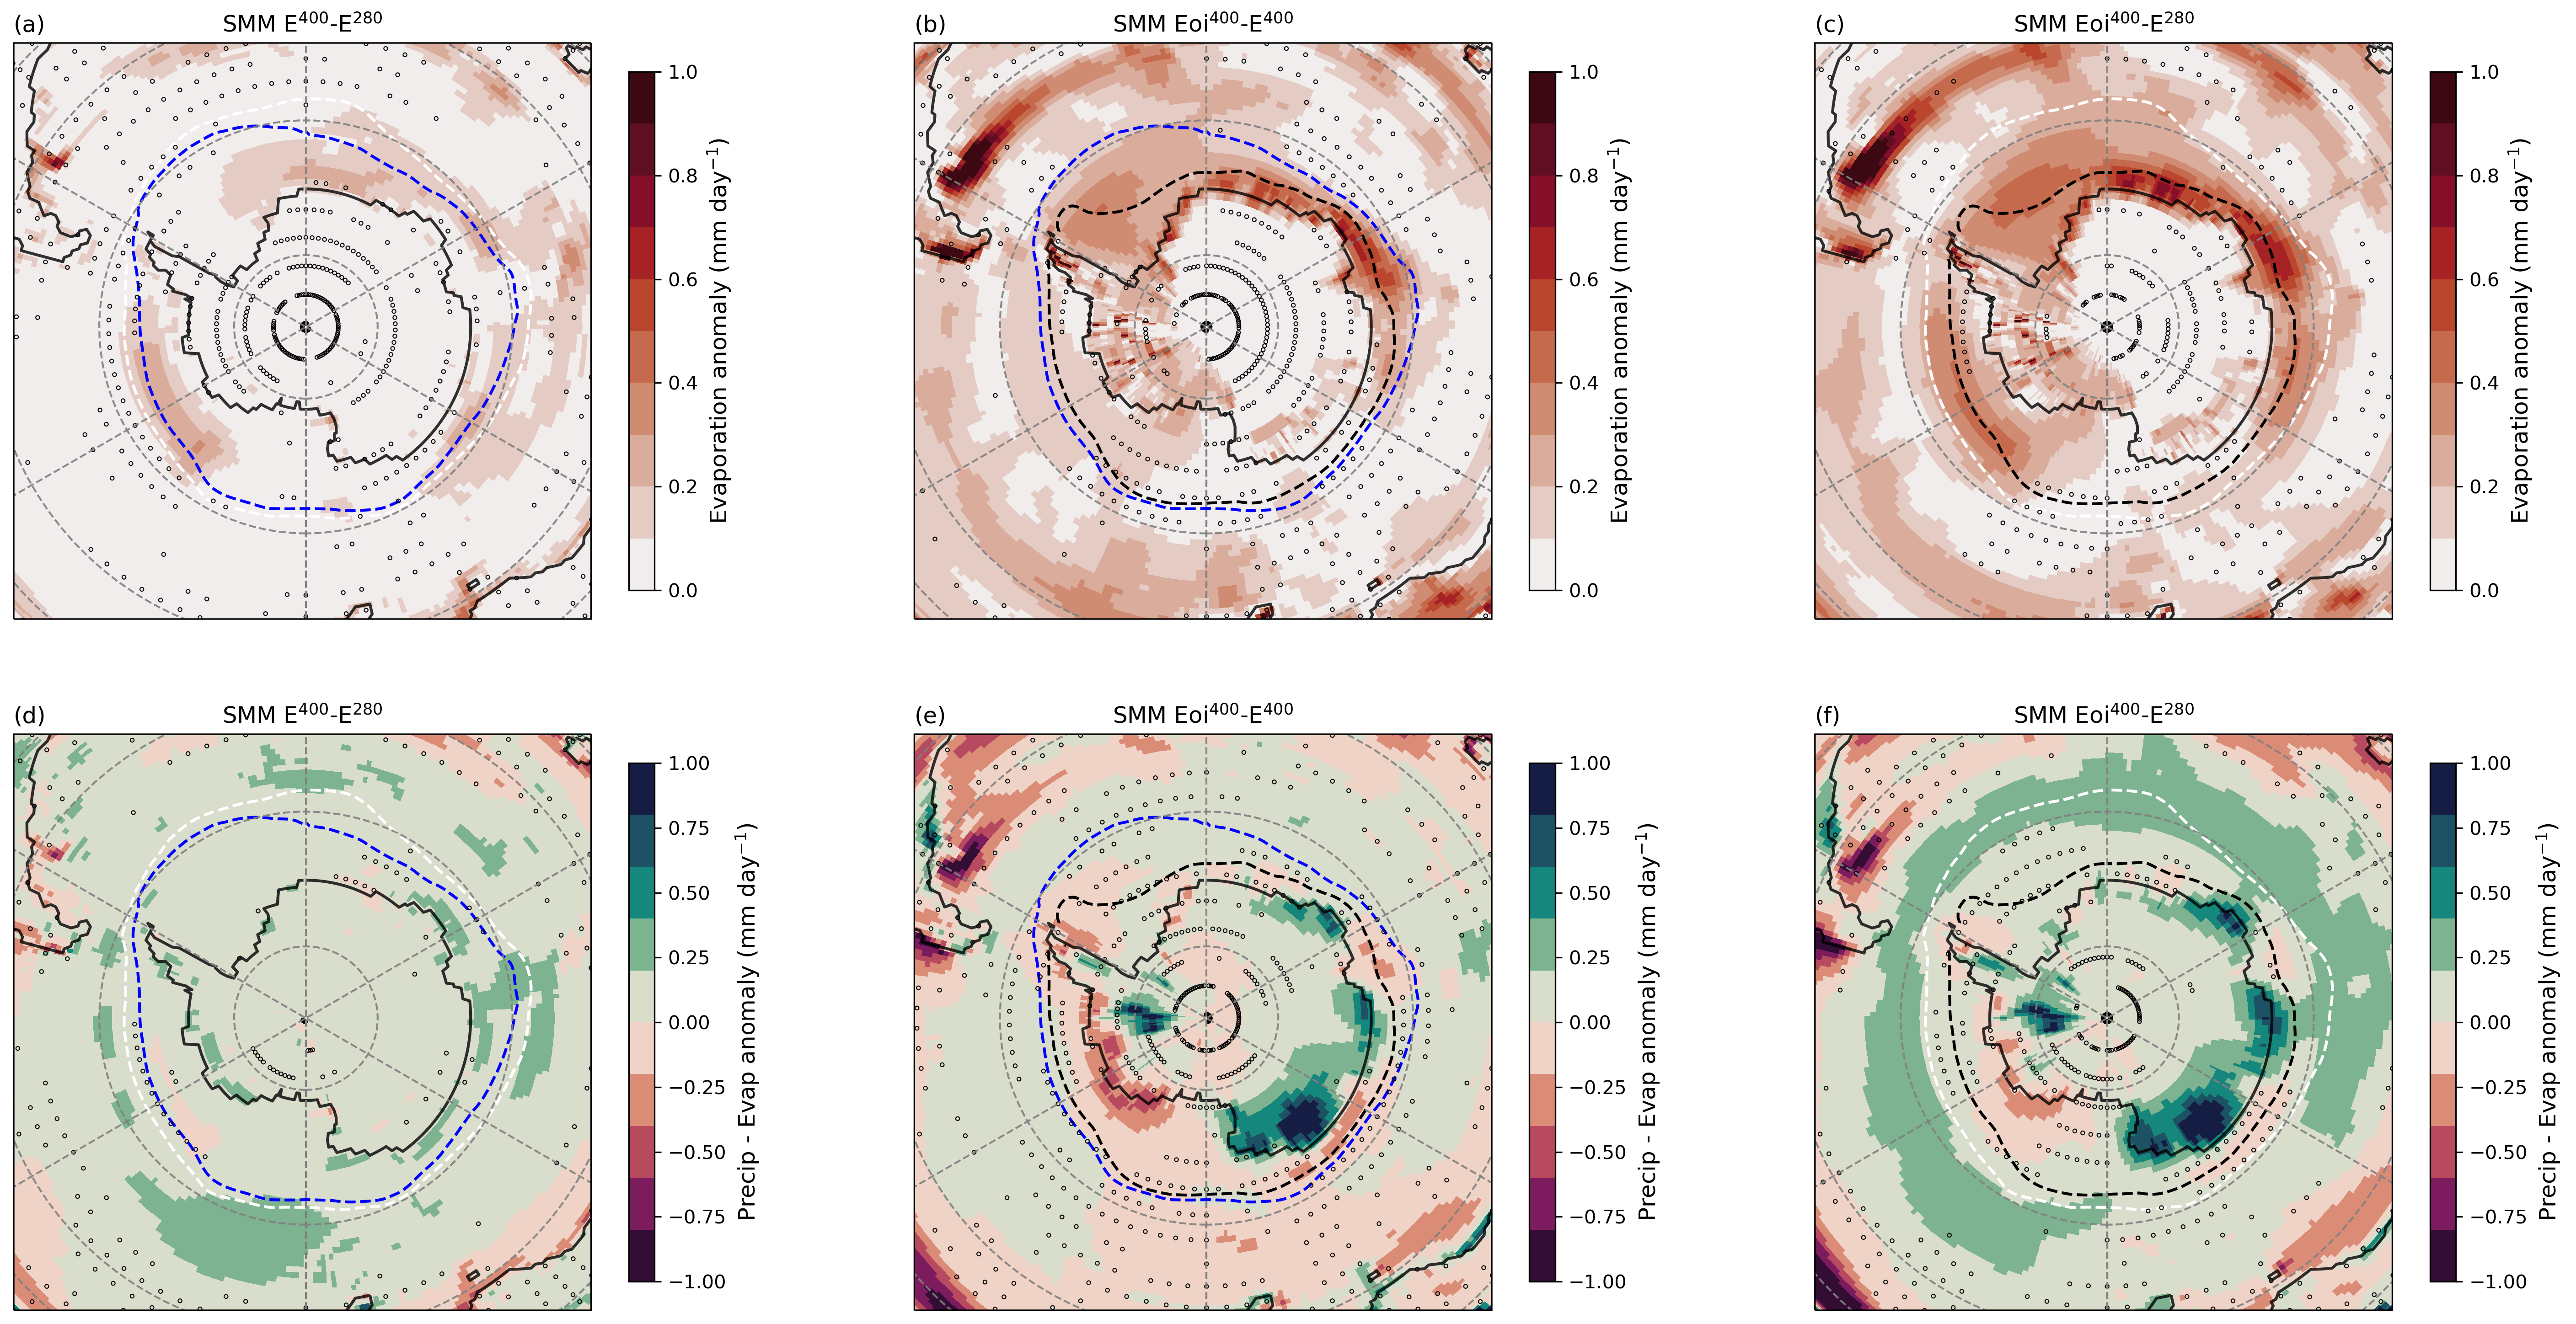

In [6]:
## creeer je figuur:
fig = plt.figure(figsize=(24,12), dpi=300)
## creeer je assen. Ik voeg hier de projectie 'plate carree' toe, Cartopy heeft verschillende, bijv EqualEarth
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)

cmap0 = plt.cm.get_cmap("cmo.rain",10).copy()
cmap0.set_under('black')

cmap2 = plt.cm.get_cmap("cmo.curl_r",10).copy()
#cmap2.set_under('black')

cmap1 = plt.cm.get_cmap("cmo.amp",10).copy()
cmap1.set_bad('black')

iceline = 15


ax = fig.add_subplot(231, projection=proj)
im=ax.pcolormesh(pmesmmE280.lon,pmesmmE280.lat,(evasmmE400-evasmmE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = 0, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskeva2==0)[::4,::4], coords.lat2D.where(maskeva2==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Evaporation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM E$^{400}$-E$^{280}$', loc='center')
ax.set_title(r'(a)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')


ax = fig.add_subplot(233, projection=proj)
im=ax.pcolormesh(pmesmmE280.lon,pmesmmE280.lat,(evasmmEoi400-evasmmE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = 0, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskeva1==0)[::4,::4], coords.lat2D.where(maskeva1==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Evaporation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{280}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(c)', loc='left')


ax = fig.add_subplot(232, projection=proj)
im=ax.pcolormesh(pmesmmE280.lon,pmesmmE280.lat,(evasmmEoi400-evasmmE400).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = 0, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskeva3==0)[::4,::4], coords.lat2D.where(maskeva3==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Evaporation anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{400}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(b)', loc='left')


ax = fig.add_subplot(234, projection=proj)
im=ax.pcolormesh(pmesmmE280.lon,pmesmmE280.lat,(pmesmmE400-pmesmmE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpme2==0)[::4,::4], coords.lat2D.where(maskpme2==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precip - Evap anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM E$^{400}$-E$^{280}$', loc='center')
ax.set_title(r'(d)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')


ax = fig.add_subplot(236, projection=proj)
im=ax.pcolormesh(pmesmmE280.lon,pmesmmE280.lat,(pmesmmEoi400-pmesmmE280).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpme1==0)[::4,::4], coords.lat2D.where(maskpme1==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precip - Evap anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{280}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(f)', loc='left')


ax = fig.add_subplot(235, projection=proj)
im=ax.pcolormesh(pmesmmE280.lon,pmesmmE280.lat,(pmesmmEoi400-pmesmmE400).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -1, vmax = 1)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400.where(siE280>=0).where(siEoi400>=0).fillna(-100), colors=['k','k'], linestyles = ['solid'], levels=[-1000,-100], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
cs1 = ax.scatter(coords.lon2D.where(maskpme3==0)[::4,::4], coords.lat2D.where(maskpme3==0)[::4,::4], s=4, facecolors='none', edgecolors='black', linewidth=0.5, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Precip - Evap anomaly (mm day$^{-1}$)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{400}$', loc='center')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

ax.set_title(r'(e)', loc='left')


#plt.savefig('SFig9.png', bbox_inches='tight')
plt.show()

In [7]:
## Sea surface salinity decrease in Southern Ocean

In [8]:
sss_so_e400e280 = ((dsE400s.so[:,0])-(dsE280s.so[:,0])).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')
sss_so_eoi400e280 = ((dsEoi400s.so[:,0])-(dsE280s.so[:,0])).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')

print('SMM Southern Ocean E400-E280 SSS anomaly is %.2f psu' %sss_so_e400e280)
print('SMM Southern Ocean Eoi400-E280 SSS anomaly is %.2f psu' %sss_so_eoi400e280)

SMM Southern Ocean E400-E280 SSS anomaly is -0.09 psu
SMM Southern Ocean Eoi400-E280 SSS anomaly is -0.12 psu


In [9]:
## Sea surface salinity decrease in areas covered by sea ice in Eoi400

In [10]:
sss_so_e400e280 = ((dsE400s.so[:,0])-(dsE280s.so[:,0])).sel(lat=slice(-90,-45)).where(dsEoi400.si_mean>=15).weighted(area).mean(dim=['lat','lon']).mean(dim='model')
sss_so_eoi400e280 = ((dsEoi400s.so[:,0])-(dsE280s.so[:,0])).sel(lat=slice(-90,-45)).where(dsEoi400.si_mean>=15).weighted(area).mean(dim=['lat','lon']).mean(dim='model')

print('SMM Southern Ocean sea-ice covered areas E400-E280 SSS anomaly is %.2f psu' %sss_so_e400e280)
print('SMM Southern Ocean sea-ice covered areas Eoi400-E280 SSS anomaly is %.2f psu' %sss_so_eoi400e280)

SMM Southern Ocean sea-ice covered areas E400-E280 SSS anomaly is -0.24 psu
SMM Southern Ocean sea-ice covered areas Eoi400-E280 SSS anomaly is -0.54 psu


In [11]:
## Difference in precipitation over Southern Ocean

In [12]:
abssopr_eoi400_e280 = (dsEoi400pr.pr-dsE280pr.pr).where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relsopr_eoi400_e280 = abssopr_eoi400_e280/((dsE280pr.pr).where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')).values*100
print('Absolute SMM Eoi400-E280 Southern Ocean precipitation anomaly is %.2f mm' %abssopr_eoi400_e280)
print('Relative SMM Eoi400-E280 Southern Ocean precipitation anomaly is %.0f %%' %relsopr_eoi400_e280)

abssopr_e400_e280 = (dsE400pr.pr-dsE280pr.pr).where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relsopr_e400_e280 = abssopr_e400_e280/((dsE280pr.pr).where(dsE280s.so[:,0]>-1e9).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')).values*100
print('Absolute SMM E400-E280 Southern Ocean precipitation anomaly is %.2f mm' %abssopr_e400_e280)
print('Relative SMM E400-E280 Southern Ocean precipitation anomaly is %.0f %%' %relsopr_e400_e280)

Absolute SMM Eoi400-E280 Southern Ocean precipitation anomaly is 0.31 mm
Relative SMM Eoi400-E280 Southern Ocean precipitation anomaly is 12 %
Absolute SMM E400-E280 Southern Ocean precipitation anomaly is 0.18 mm
Relative SMM E400-E280 Southern Ocean precipitation anomaly is 7 %


In [13]:
## Difference in precipitation over Antarctica

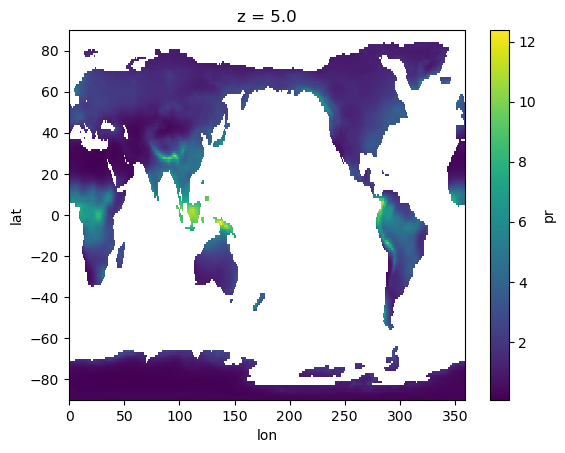

In [14]:
#Selecting precipitation only over land using the salinity fields
dsEoi400pr.pr.where(ssssmmEoi400.fillna(-100)==-100).mean(dim='model').plot()

In [15]:
## Precipitation over Antarctica

In [16]:
absantpr_eoi400_e280 = (dsEoi400pr.pr-dsE280pr.pr).where(dsE280s.so[:,0].fillna(-100)==-100).sel(lat=slice(-90,-60)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relantpr_eoi400_e280 = absantpr_eoi400_e280/((dsE280pr.pr).where(dsE280s.so[:,0].fillna(-100)==-100).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')).values*100
print('Absolute SMM Eoi400-E280 Antarctica precipitation anomaly is %.2f mm' %absantpr_eoi400_e280)
print('Relative SMM Eoi400-E280 Antarctica precipitation anomaly is %.0f %%' %relantpr_eoi400_e280)

Absolute SMM Eoi400-E280 Antarctica precipitation anomaly is 0.30 mm
Relative SMM Eoi400-E280 Antarctica precipitation anomaly is 43 %


In [17]:
absantpr_e400_e280 = (dsE400pr.pr-dsE280pr.pr).where(dsE280s.so[:,0].fillna(-100)==-100).sel(lat=slice(-90,-60)).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values
relantpr_e400_e280 = absantpr_e400_e280/((dsE280pr.pr).where(dsE280s.so[:,0].fillna(-100)==-100).sel(lat=slice(-90,-45)).weighted(area).mean(dim=['lat','lon']).mean(dim='model')).values*100
print('Absolute SMM E400-E280 Antarctica precipitation anomaly is %.2f mm' %absantpr_e400_e280)
print('Relative SMM E400-E280 Antarctica precipitation anomaly is %.0f %%' %relantpr_e400_e280)

Absolute SMM E400-E280 Antarctica precipitation anomaly is 0.10 mm
Relative SMM E400-E280 Antarctica precipitation anomaly is 14 %
